In [26]:
#The goal of the machine learning problem is to predict the size of crew ship for potential buyers
#Import the necessary library
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


# Import the dataset.
ship_data = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/master/cruise_ship_info.csv")

ship_data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [35]:
#As part of solving the machine learning problem, the goal is to find the relationship between various features
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Tonnage', 'passengers', 'length','cabins','passenger_density','crew']
stdsc = StandardScaler()
X_std = stdsc.fit_transform(ship_data[features].iloc[:,range(0,7)].values)
cov_mat = np.cov(X_std.T)
cov_mat

array([[-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [ 1.35810515, -0.64731003, -0.37292634, ..., -0.31409539,
        -0.9406764 , -0.31330399],
       ...,
       [ 1.22637979, -1.77666231, -1.74960252, ..., -1.81502263,
        -0.70147068, -1.97978836],
       [ 1.48983051, -1.77666231, -1.74027264, ..., -1.81502263,
        -0.91280777, -1.97978836],
       [ 0.96292907, -1.52350654, -1.59410446, ..., -1.63105247,
         0.92536041, -1.71635785]])

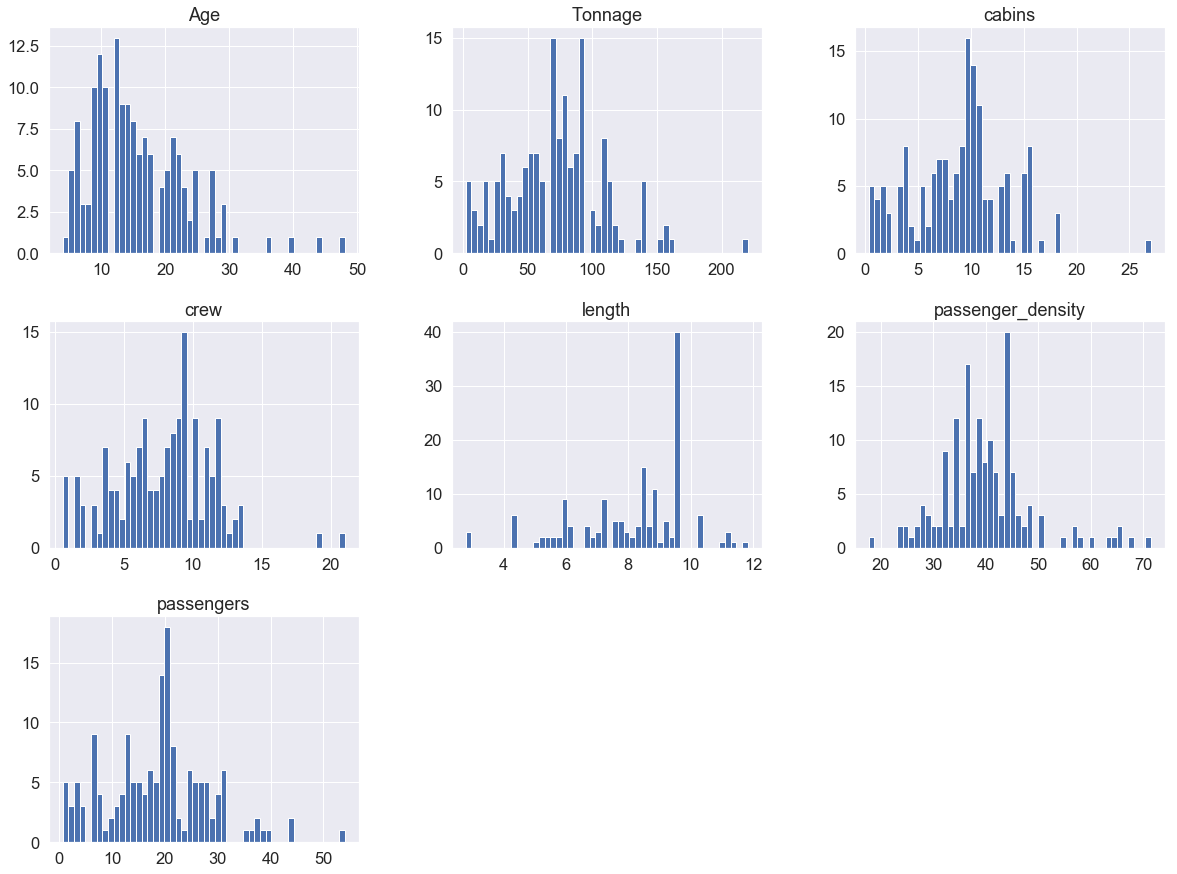

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
ship_data.hist(bins=50, figsize=(20,15))

plt.show()

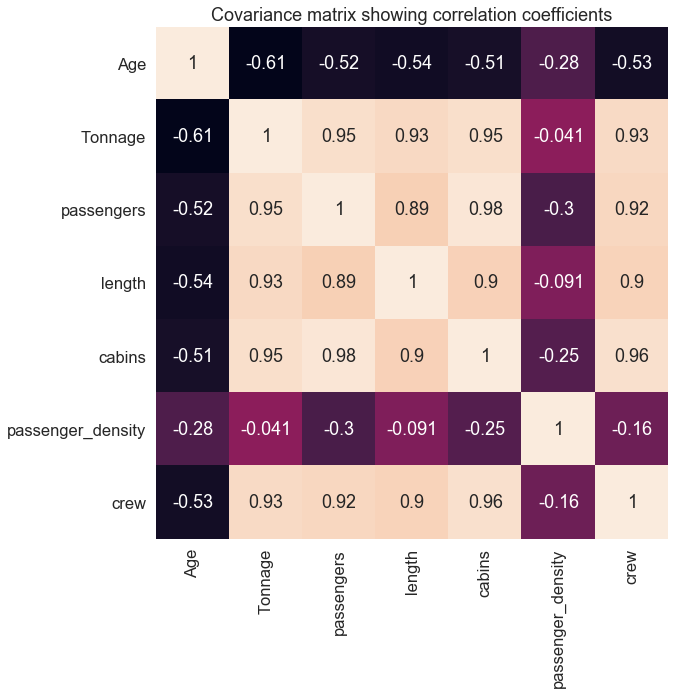

In [57]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)

ax = sns.heatmap(cov_mat,annot=True, cbar=False, square = True, xticklabels = features, yticklabels = features)

plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [59]:
features_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
ship_data[features_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [61]:
#Let's build the model with X and y. We select the features and do modelling on the features to get the y

X = ship_data[features_selected].iloc[:,0:4].values #features selected
y = ship_data[features_selected]['crew'].values #target variable

In [63]:
#Model building - Pick the machine learning model. 
#Linear Regression (LR), KNeighbors Regression (KNR), and Support Vector Regression (SVR)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('lr',    
                     LinearRegression())])
pipe_knr = Pipeline([('scl', StandardScaler()),('knr', 
                     KNeighborsRegressor(n_neighbors = 3))])
pipe_svr = Pipeline([('scl', StandardScaler()),('svr', 
                     SVR(kernel='linear',C=1.0))])
sc_y = StandardScaler()
train_score_lr = []
train_score_knr =  []
train_score_svr =  []
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                      test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, 
                                            np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr, 
                               np.mean(cross_val_score(pipe_lr, 
                               X_train, y_train_std, 
                               scoring ='r2' , cv = 10)))
    train_score_knr = np.append(train_score_knr, 
                               np.mean(cross_val_score(pipe_knr, 
                               X_train, y_train_std, 
                               scoring ='r2' , cv = 10)))
    train_score_svr = np.append(train_score_svr, 
                               np.mean(cross_val_score(pipe_svr, 
                               X_train, y_train_std,  
                               scoring ='r2' , cv = 10)))
train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knr = np.mean(train_score_knr)
train_std_knr = np.std(train_score_knr)
train_mean_svr = np.mean(train_score_svr)
train_std_svr = np.std(train_score_svr)

In [64]:
print('R2 train for lr: %.3f +/- %.3f' % 
                    (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' %    
                    (train_mean_knr,train_std_knr))
print('R2 train for svm_lr: %.3f +/- %.3f' % 
                    (train_mean_svr,train_std_svr))

R2 train for lr: 0.914 +/- 0.013
R2 train for knn_lr: 0.866 +/- 0.027
R2 train for svm_lr: 0.913 +/- 0.015


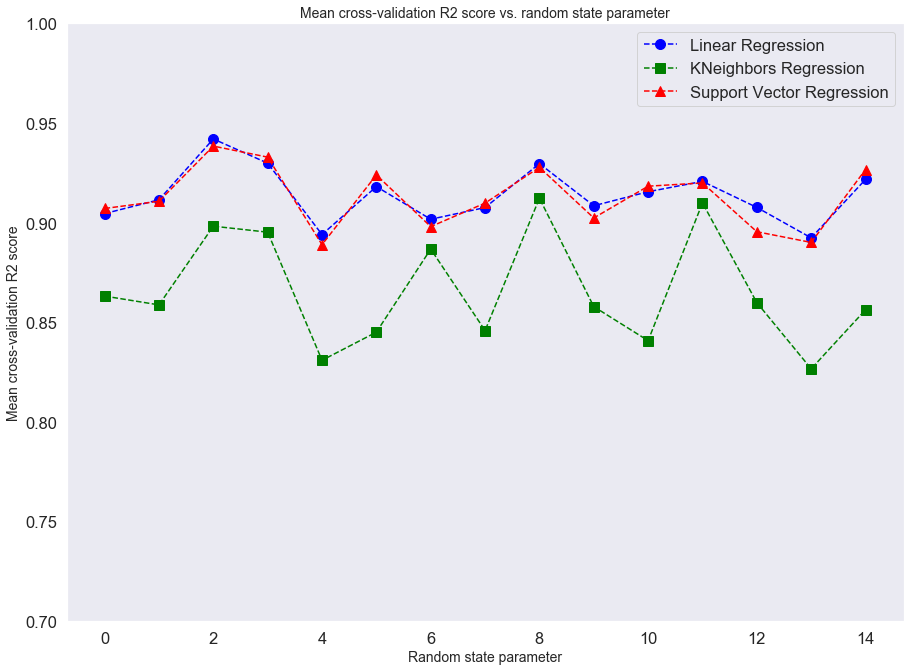

In [65]:
plt.figure(figsize=(15,11))
plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label= 'Linear Regression')
plt.plot(range(n),train_score_knr,color='green', linestyle='dashed', 
         marker='s',markerfacecolor='green', markersize=10, label = 'KNeighbors Regression')
plt.plot(range(n),train_score_svr,color='red', linestyle='dashed', 
         marker='^',markerfacecolor='red', markersize=10, label = 'Support Vector Regression')
plt.grid()
plt.ylim(0.7,1)
plt.title ('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()

In [66]:
pipe_lr.fit(X_train, y_train_std)
pipe_knr.fit(X_train, y_train_std)
pipe_svr.fit(X_train, y_train_std)
r2_score_lr = r2_score(y_test, 
                   sc_y.inverse_transform(pipe_lr.predict(X_test)))
r2_score_knr = r2_score(y_test, 
                   sc_y.inverse_transform(pipe_knr.predict(X_test)))
r2_score_svr = r2_score(y_test, 
                  sc_y.inverse_transform(pipe_svr.predict(X_test)))
print('R2 test for lr:  %.3f ' % r2_score_lr)
print('R2 test for knr: %.3f ' % r2_score_knr)
print('R2 test for svr: %.3f ' % r2_score_svr)

R2 test for lr:  0.938 
R2 test for knr: 0.888 
R2 test for svr: 0.948 


In [68]:
# Train the model using the training sets
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [69]:
#Make predictions using the testing set
crew_predict = pipe_lr.predict(X_test)

Mean squared error: 0.57
Coefficient of determination: 0.94


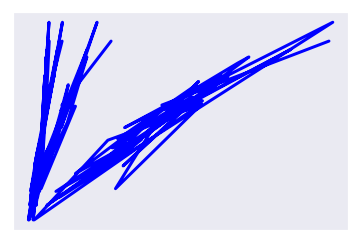

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
#print('Coefficients: \n', pipe_lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,crew_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,crew_predict))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, crew_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()